In [15]:
# First, let's open and read the contents of the uploaded file to understand its structure and format
file_path = 'Volcano_Dataset/Volcano1/observation1.txt'

with open(file_path, 'r') as file:
    file_contents = file.read()


print(file_contents)  

v,0.25
Patm,100000
g,9.81
r,500
G,10^11.12
rho,2200
mu,10^3.51
rc,18
 
M,10^6.18
sigma,0.1
 
tilt_erupt,3.1271nrad
 
-1052,-1051,-1050,-1049,-1048,-1047,-1046,-1045,-1044,-1043,-1042,-1041,-1040,-1039,-1038,-1037,-1036,-1035,-1034,-1033,-1032,-1031,-1030,-1029,-1028,-1027,-1026,-1025,-1024,-1023,-1022,-1021,-1020,-1019,-1018,-1017,-1016,-1015,-1014,-1013,-1012,-1011,-1010,-1009,-1008,-1007,-1006,-1005,-1004,-1003,-1002,-1001,-1000,-999,-998,-997,-996,-995,-994,-993,-992,-991,-990,-989,-988,-987,-986,-985,-984,-983,-982,-981,-980,-979,-978,-977,-976,-975,-974,-973,-972,-971,-970,-969,-968,-967,-966,-965,-964,-963,-962,-961,-960,-959,-958,-957,-956,-955,-954,-953,-952,-951,-950,-949,-948,-947,-946,-945,-944,-943,-942,-941,-940,-939,-938,-937,-936,-935,-934,-933,-932,-931,-930,-929,-928,-927,-926,-925,-924,-923,-922,-921,-920,-919,-918,-917,-916,-915,-914,-913,-912,-911,-910,-909,-908,-907,-906,-905,-904,-903,-902,-901,-900,-899,-898,-897,-896,-895,-894,-893,-892,-891,-890,-889,-888,-887,

In [16]:
import pandas as pd

# Splitting the file content into lines
lines = file_contents.split('\n')

# Extracting the properties (variables and values) at the beginning of the file
properties = {}
empty_line_count = 0
for line in lines:
    if line.strip() == "":
        empty_line_count += 1
        if empty_line_count == 2:
            # Break on the second empty line, indicating the end of the properties section
            break
        continue
    key, value = line.split(',')
    properties[key] = value

# Extracting the lines containing the time steps and tilt_erupt values
# These should be the last two non-empty lines in the file
time_series_lines = [line for line in lines if line.strip() != ""][-2:]

# Splitting the lines into individual values
time_steps = time_series_lines[0].split(',')
tilt_erupt_values = time_series_lines[1].split(',')



# Converting time steps and tilt_erupt values to a DataFrame
time_series_data = pd.DataFrame({
    'Time Step': time_steps,
    'Tilt Erupt (radians)': tilt_erupt_values
})

# Displaying the first few rows of the time series data and the extracted properties
print(time_series_data.head())
print(properties)


  Time Step   Tilt Erupt (radians)
0     -1052  -4.87775135323027e-12
1     -1051  -5.41769735416295e-11
2     -1050   6.28908620278579e-11
3     -1049   8.04923683770754e-11
4     -1048   1.69726718818826e-10
{'v': '0.25', 'Patm': '100000', 'g': '9.81', 'r': '500', 'G': '10^11.12', 'rho': '2200', 'mu': '10^3.51', 'rc': '18', 'M': '10^6.18', 'sigma': '0.1'}


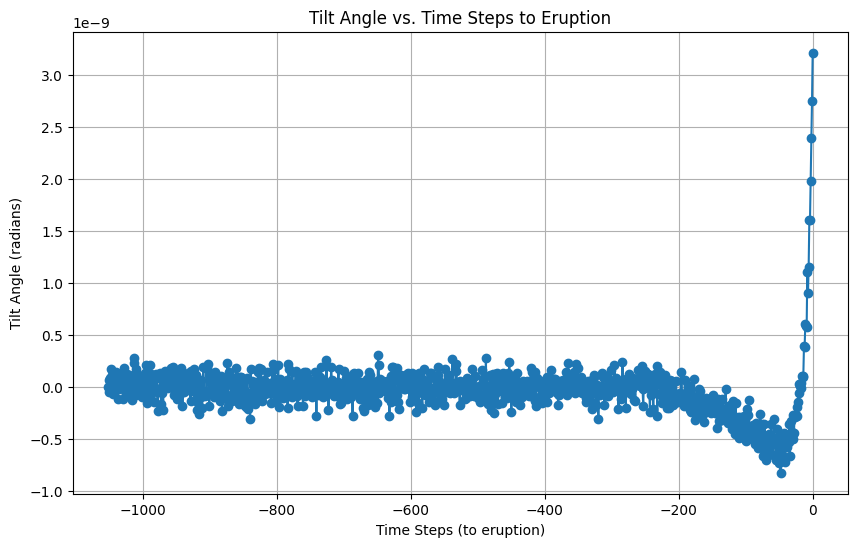

In [17]:
import matplotlib.pyplot as plt

# Converting the 'Time Step' and 'Tilt Erupt (radians)' columns to numeric for plotting
time_series_data['Time Step'] = pd.to_numeric(time_series_data['Time Step'])
time_series_data['Tilt Erupt (radians)'] = pd.to_numeric(time_series_data['Tilt Erupt (radians)'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Time Step'], time_series_data['Tilt Erupt (radians)'], marker='o', linestyle='-')
plt.title('Tilt Angle vs. Time Steps to Eruption')
plt.xlabel('Time Steps (to eruption)')
plt.ylabel('Tilt Angle (radians)')
plt.grid(True)
plt.show()


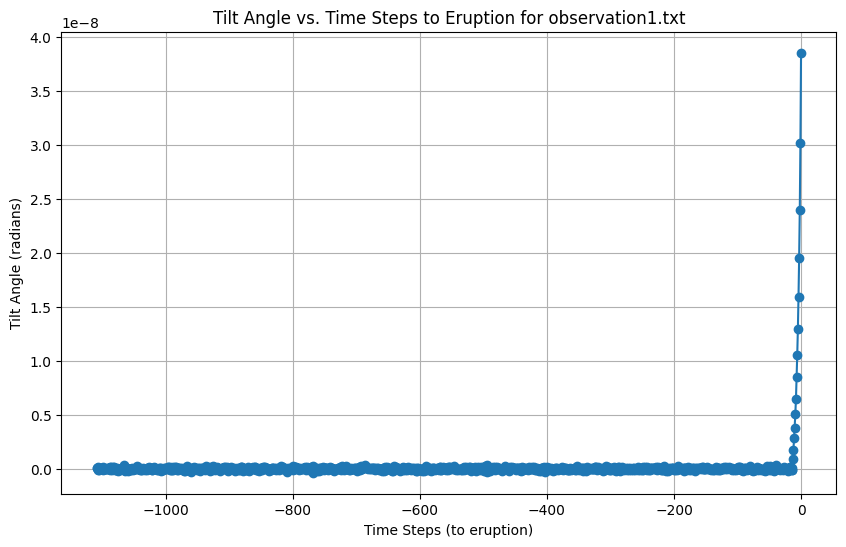

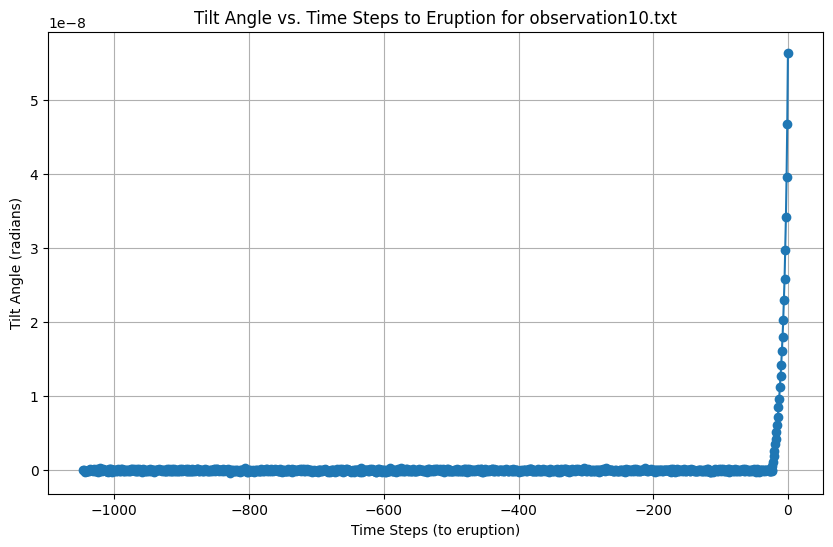

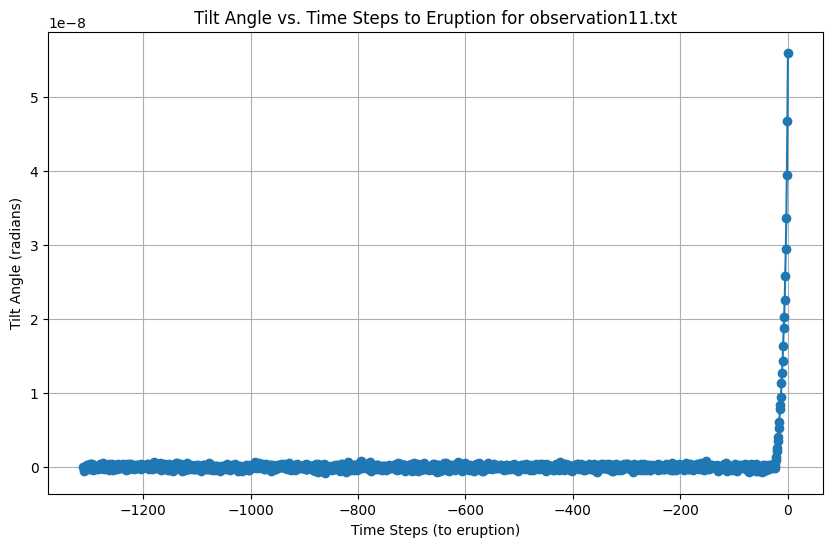

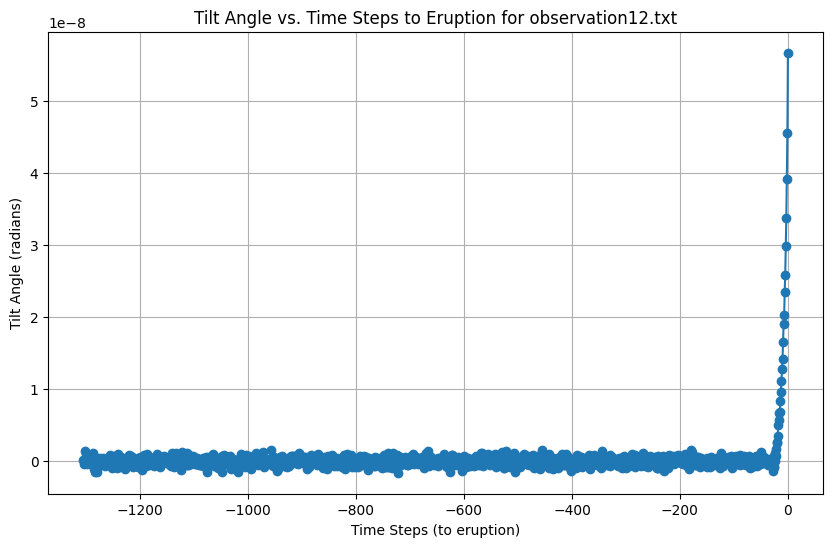

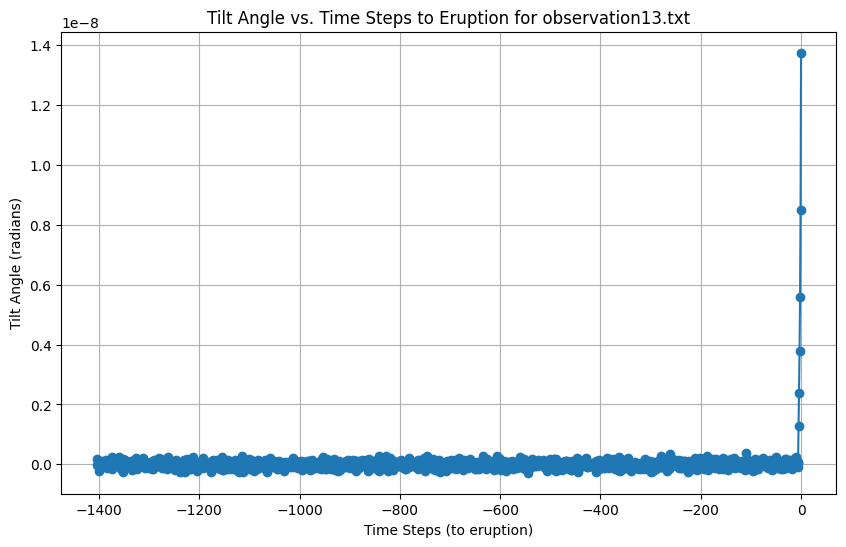

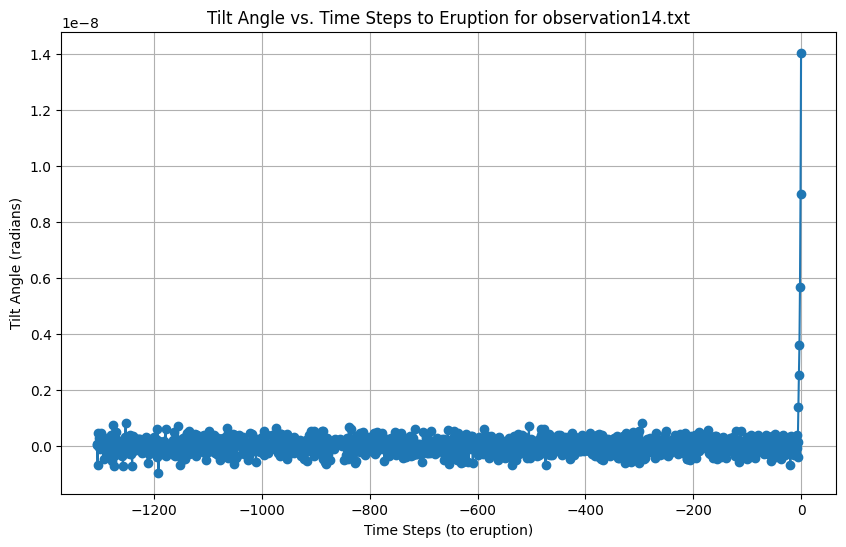

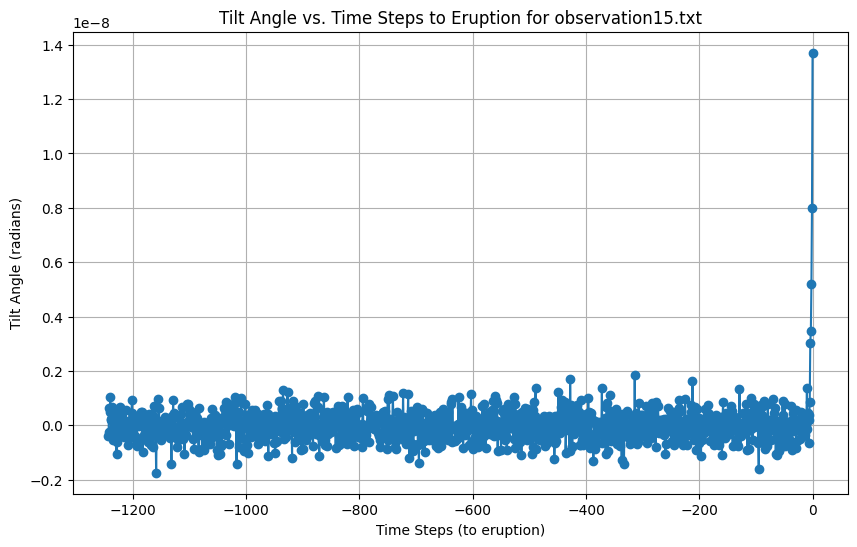

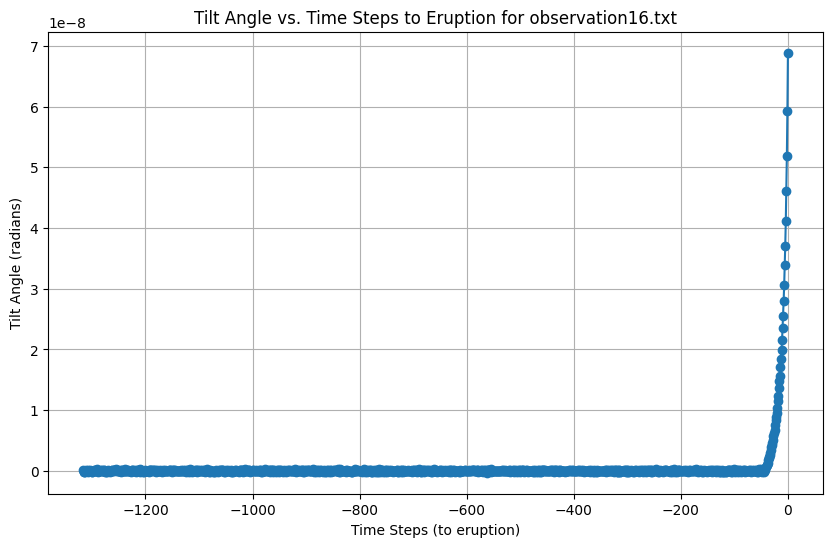

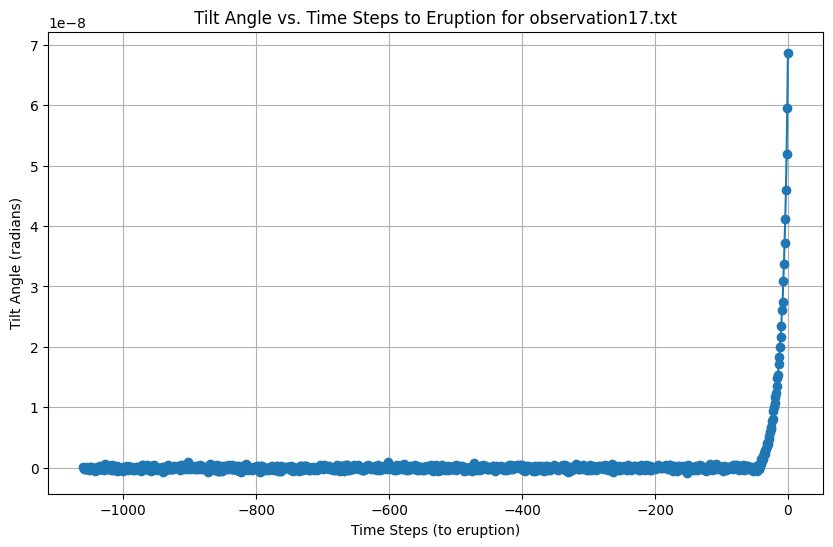

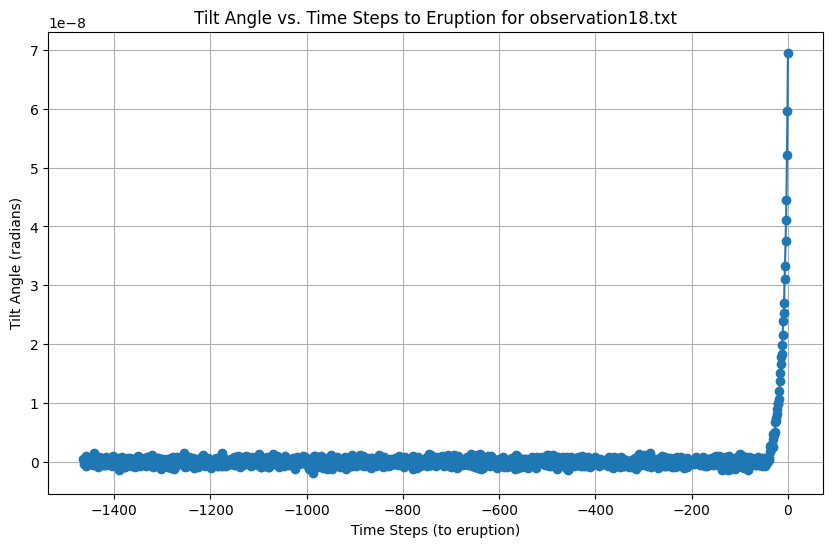

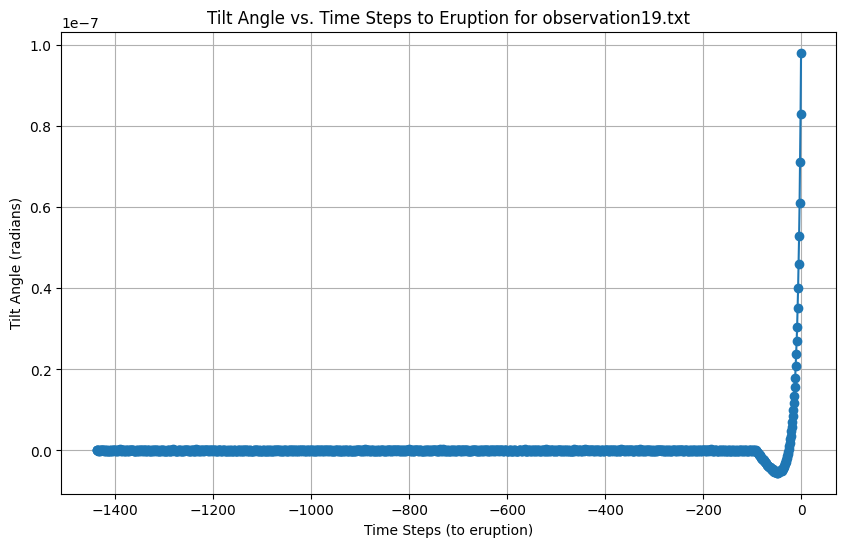

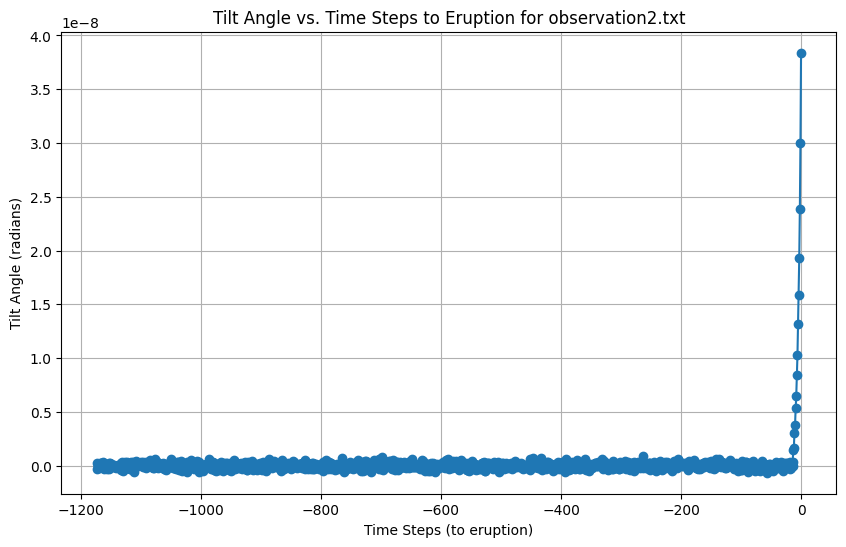

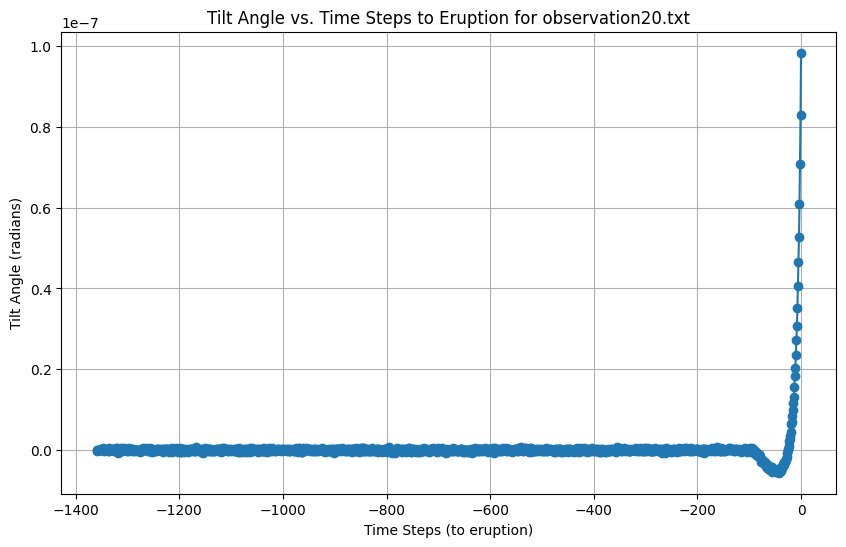

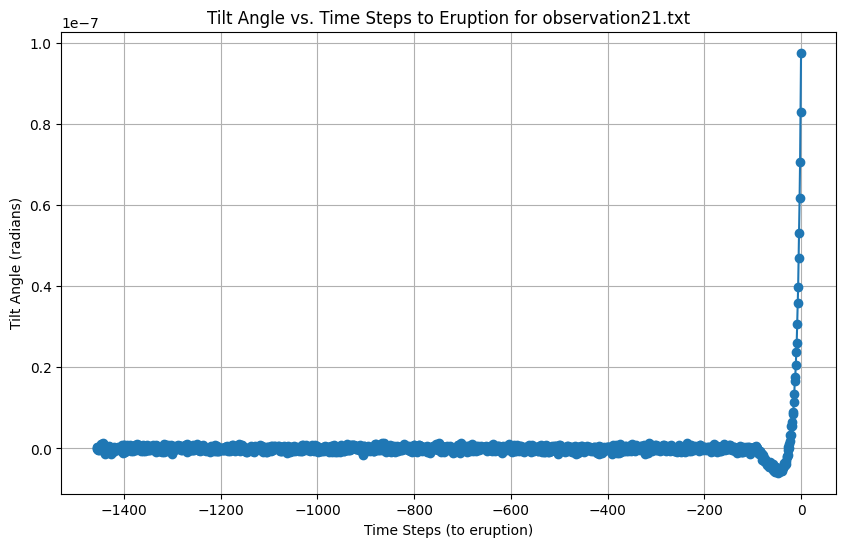

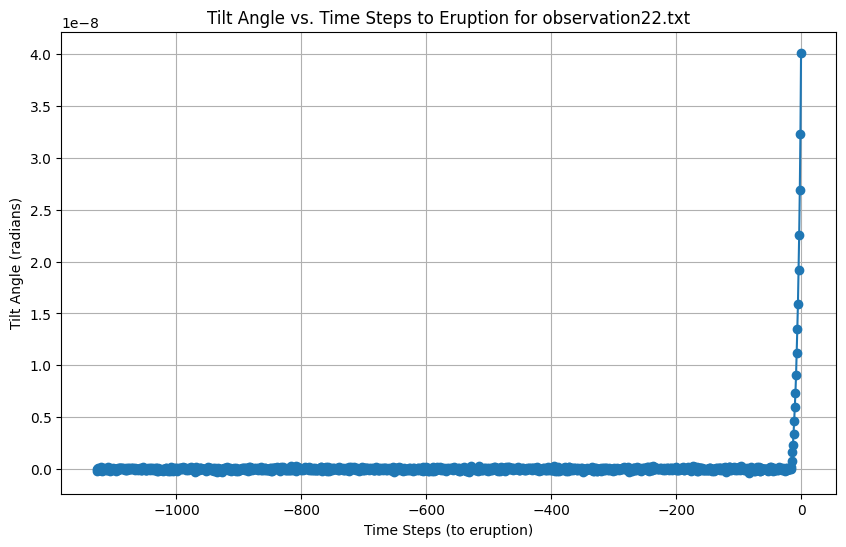

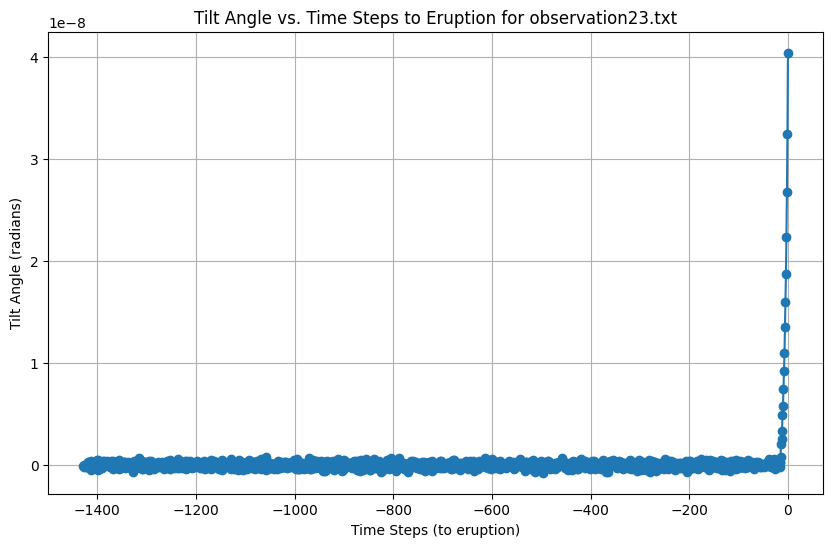

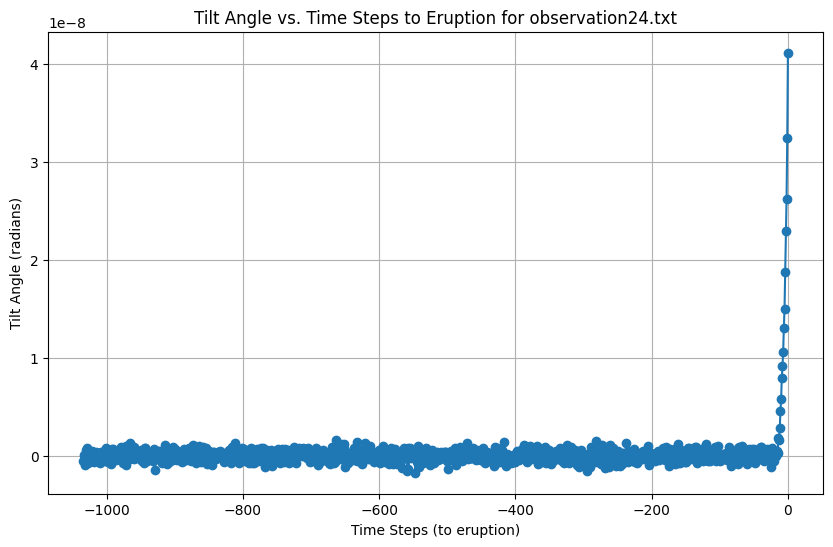

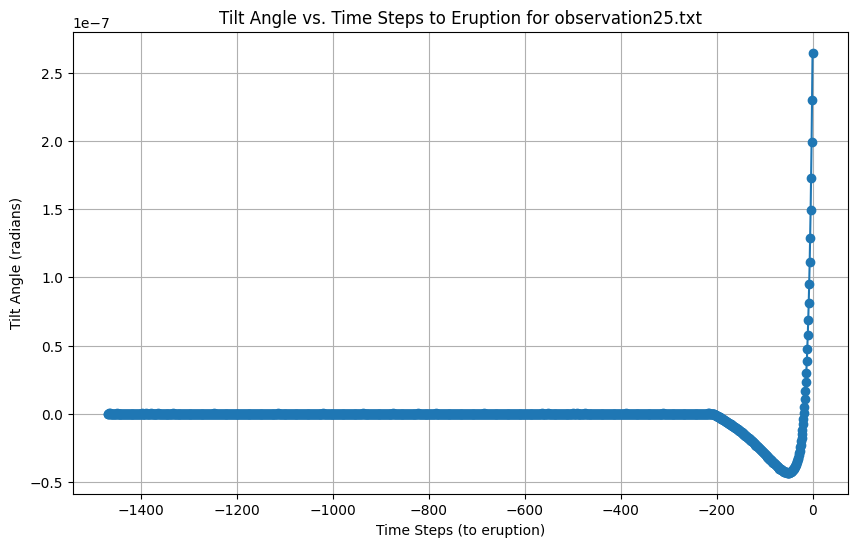

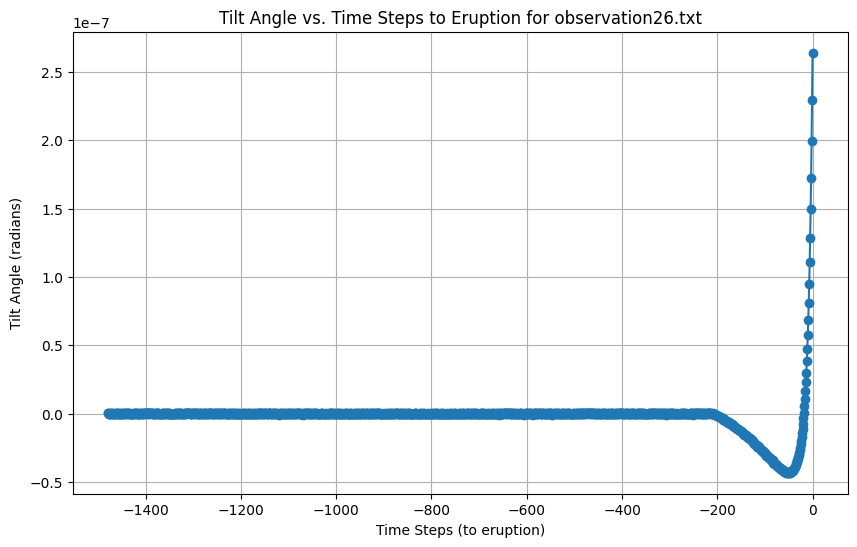

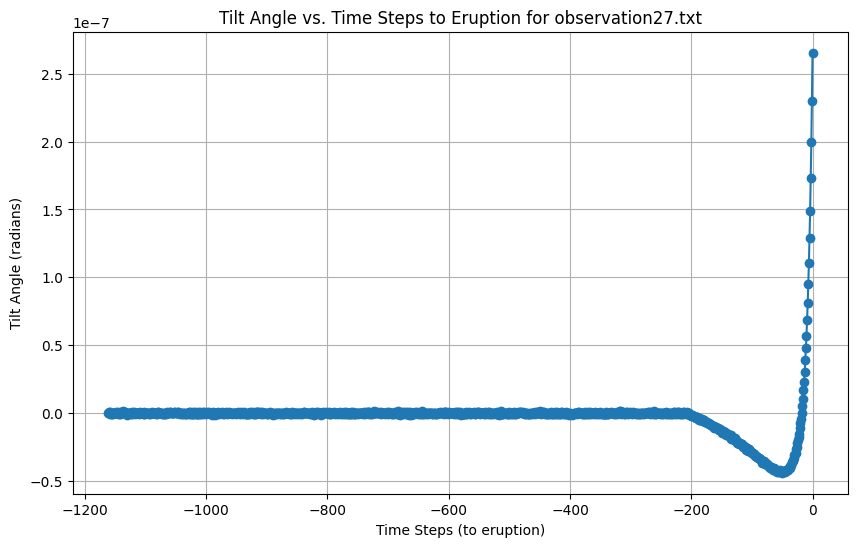

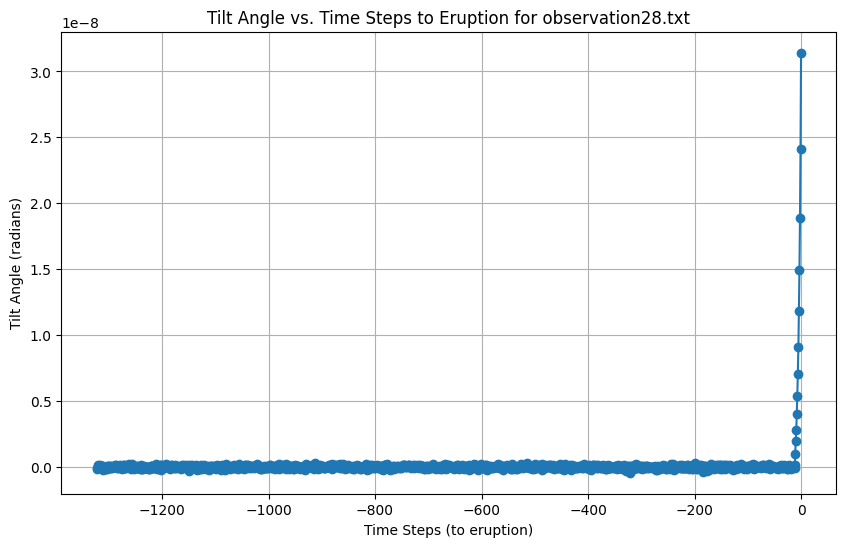

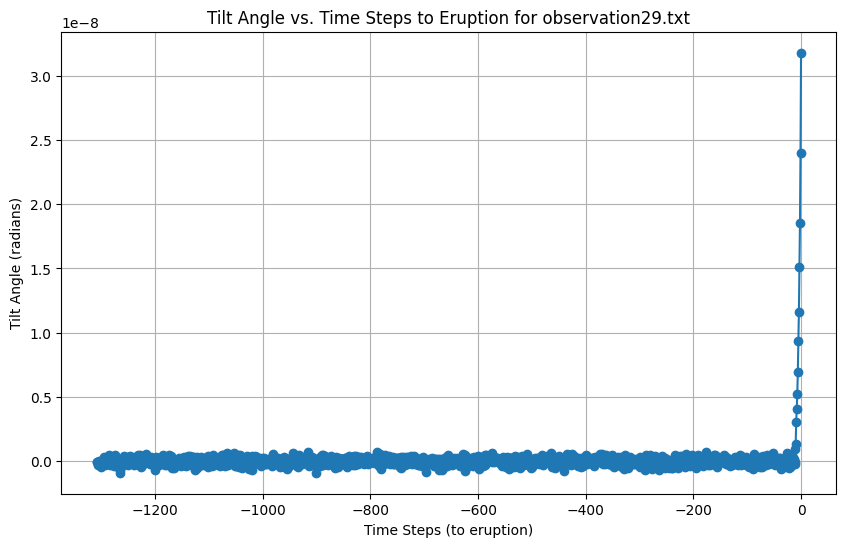

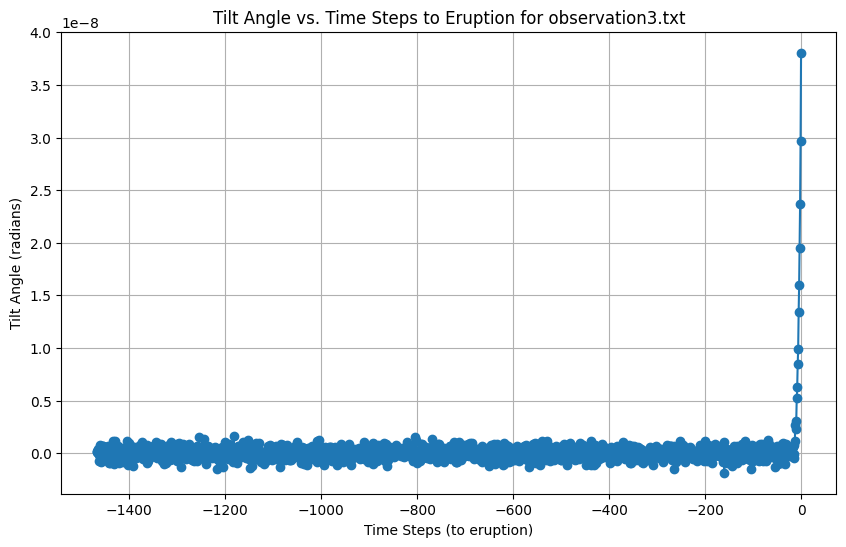

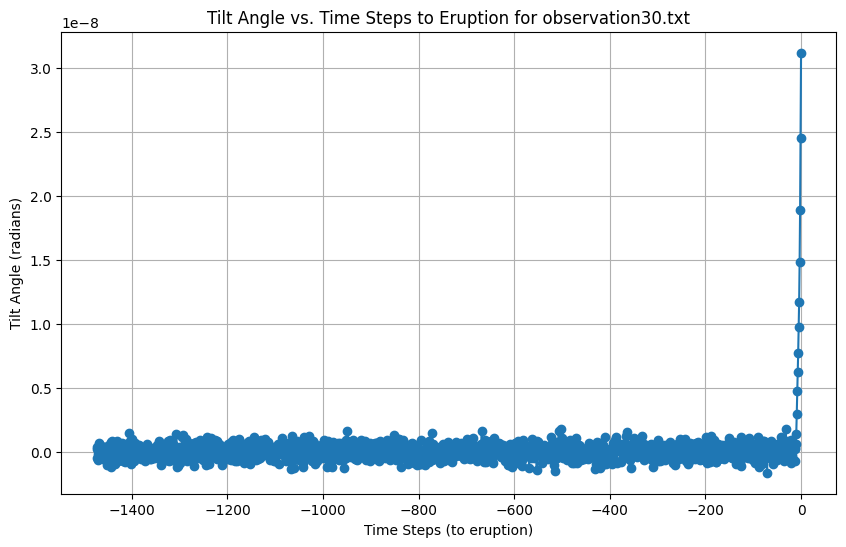

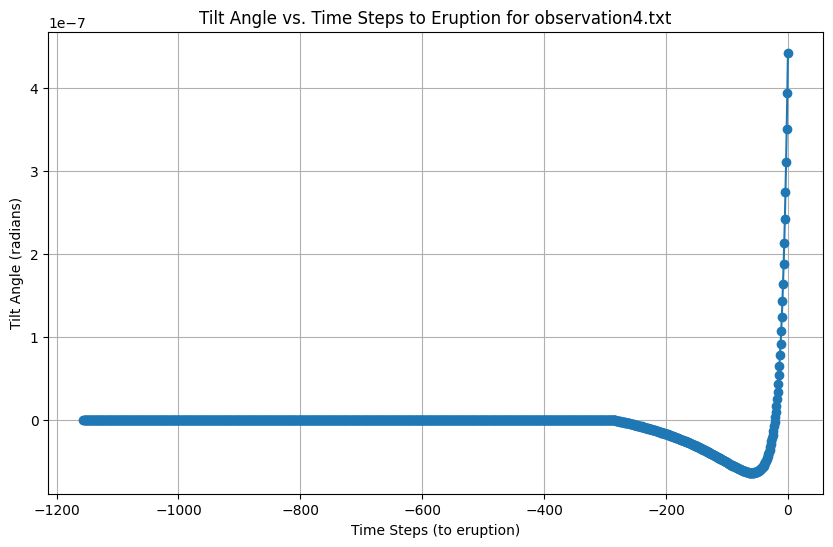

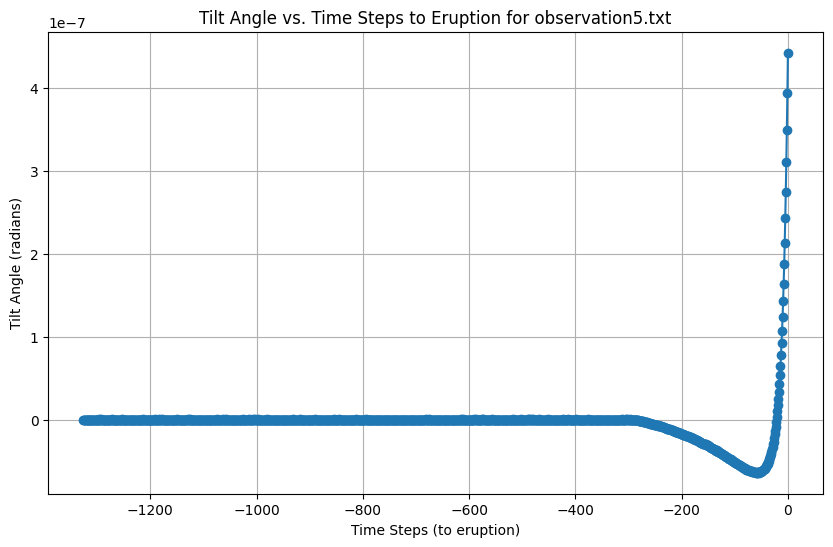

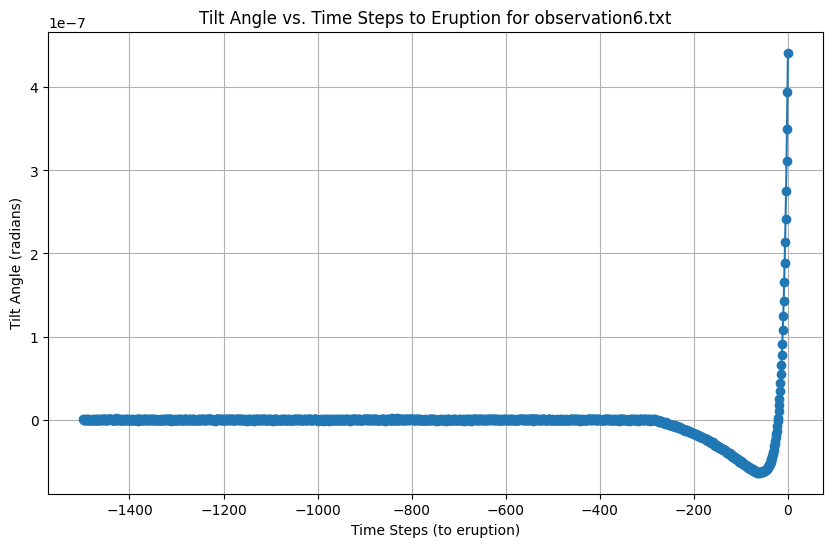

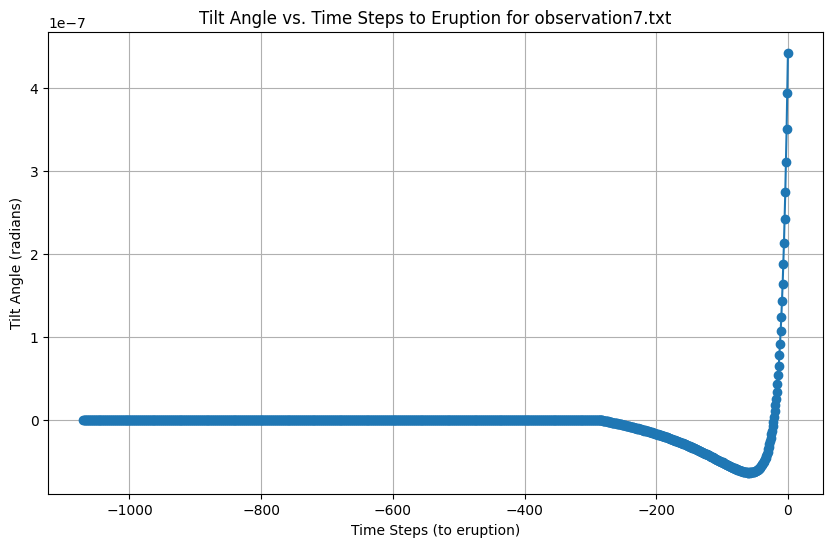

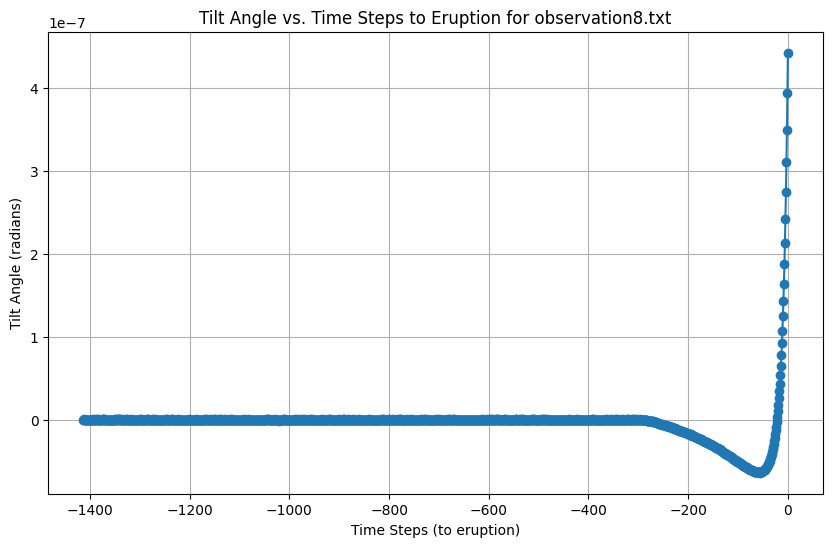

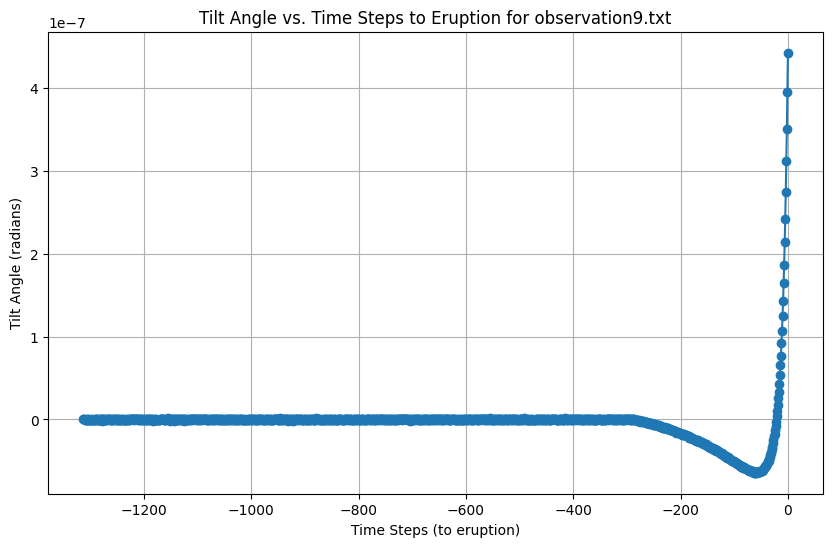

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory_path = 'Volcano_Dataset/Volcano3'

# Loop over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)

        with open(file_path, 'r') as file:
            file_contents = file.read()

        # Splitting the file content into lines
        lines = file_contents.split('\n')

        # Extracting the properties
        properties = {}
        empty_line_count = 0
        for line in lines:
            if line.strip() == "":
                empty_line_count += 1
                if empty_line_count == 2:
                    break
                continue
            key, value = line.split(',')
            properties[key] = value

        # Extracting the time series data
        time_series_lines = [line for line in lines if line.strip() != ""][-2:]
        time_steps = time_series_lines[0].split(',')
        tilt_erupt_values = time_series_lines[1].split(',')

        # Creating the DataFrame
        time_series_data = pd.DataFrame({
            'Time Step': time_steps,
            'Tilt Erupt (radians)': tilt_erupt_values
        })

        # Converting to numeric
        time_series_data['Time Step'] = pd.to_numeric(time_series_data['Time Step'])
        time_series_data['Tilt Erupt (radians)'] = pd.to_numeric(time_series_data['Tilt Erupt (radians)'])

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(time_series_data['Time Step'], time_series_data['Tilt Erupt (radians)'], marker='o', linestyle='-')
        plt.title(f'Tilt Angle vs. Time Steps to Eruption for {filename}')
        plt.xlabel('Time Steps (to eruption)')
        plt.ylabel('Tilt Angle (radians)')
        plt.grid(True)
        plt.show()
